## AuxTel test LTS-337-016 (Tracking) - Tracking tests 2021/10 Observing Run (254-273 (70 degrees EL) &  275-294 (60 degrees EL))

In this notebook, we check the tracking accuracy of the telescope by taking a series of 20 images over a 10 minute period.  Desired specs:

| Description | Value       | Unit          |   Name     |
| :---        |    :----:   |       :----:  |       ---: |
|The Auxiliary Telescope shall have a open-loop tracking accuracy over a 10 minute interval within the tracking range of:     | 2.0       | Arcsec RMS   |Aux_Tel_Tel_Track_Error|
The Auxiliary Telescope shall have the ability to track for a minimum time of: | 10| Minutes |Aux_Tel_Max_track_time|
|The Auxiliary Telescope shall be able to track in azimuth over the angular range of:|+/- 270       | Degrees     |Aux_Tel_Az_Track_Range|
|Tracking Range in elevation shall be at least:   | 20-86.5|Degrees|Aux_Tel_El_Track_Range_High|

In [9]:
import sys, time, os, asyncio
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates

from astropy.time import Time, TimeDelta
from astropy.coordinates import SkyCoord, AltAz, ICRS, EarthLocation, Angle, FK5
import astropy.units as u

from lsst.pipe.tasks.quickFrameMeasurement import QuickFrameMeasurementTask
import lsst.daf.persistence as dafPersist

import pandas as pd

In [10]:
# Set Cerro Pachon location and observation time
location = EarthLocation.from_geodetic(lon=-70.749417*u.deg,
                                       lat=-30.244639*u.deg,
                                       height=2663.0*u.m)

In [11]:
REPO_DIR = '/project/shared/auxTel/rerun/quickLook'
butler = dafPersist.Butler(REPO_DIR)

# Get the start and end times

In [12]:
# Get the start and end time
firstExpIds = [[2021100500254, 20], [2021100500275, 20]]
#numExp = 2
positionData = {}
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)

for firstExpId in firstExpIds:
    print('Vamos con la', firstExpId[0])
    data = {}
    tStart = []
    tEnd = []
    source = []
    numExp = firstExpId[1]
    for i in range(numExp):
        expId = firstExpId[0] + i
        exp = butler.get('quickLookExp', detector=0, expId=expId)
        mData = exp.getMetadata()
        tStart.append(mData['DATE-BEG'])
        tEnd.append(mData['DATE-END'])
        source.append(mData['OBJECT'])
    data['StartTime'] = tStart
    data['EndTime'] = tEnd
    data['Source'] = source
    positionData[firstExpId[0]] = data
               
               
print(positionData)

Vamos con la 2021100500254


CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000254: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000255: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000256: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000257: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000258: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000259: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000260: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_0002

Vamos con la 2021100500275


CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000275: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000276: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000277: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000278: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000279: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000280: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000281: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_0002

{2021100500254: {'StartTime': ['2021-10-06T02:28:32.030', '2021-10-06T02:29:04.946', '2021-10-06T02:29:37.764', '2021-10-06T02:30:10.543', '2021-10-06T02:30:43.402', '2021-10-06T02:31:16.210', '2021-10-06T02:31:49.166', '2021-10-06T02:32:22.151', '2021-10-06T02:32:55.155', '2021-10-06T02:33:28.066', '2021-10-06T02:34:01.068', '2021-10-06T02:34:34.058', '2021-10-06T02:35:06.986', '2021-10-06T02:35:39.793', '2021-10-06T02:36:12.706', '2021-10-06T02:36:45.515', '2021-10-06T02:37:18.423', '2021-10-06T02:37:51.345', '2021-10-06T02:38:24.156', '2021-10-06T02:38:57.081'], 'EndTime': ['2021-10-06T02:29:01.260', '2021-10-06T02:29:34.181', '2021-10-06T02:30:06.995', '2021-10-06T02:30:39.779', '2021-10-06T02:31:12.627', '2021-10-06T02:31:45.443', '2021-10-06T02:32:18.394', '2021-10-06T02:32:51.392', '2021-10-06T02:33:24.383', '2021-10-06T02:33:57.303', '2021-10-06T02:34:30.295', '2021-10-06T02:35:03.294', '2021-10-06T02:35:36.212', '2021-10-06T02:36:09.032', '2021-10-06T02:36:41.935', '2021-10-06

In [13]:
import json
#json.dump(positionData, a_file)
f = open("202110_StartEndTimes","w")

f.write(json.dumps(positionData))

# close file
f.close()


In [14]:
# Reconstructing the dictionary from the b_file that contains the #importing the module
import json
  
# reading the data from the file
with open('202110_StartEndTimes') as f:
    data = f.read()
  
print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
positionData = json.loads(data)
  
print("Data type after reconstruction : ", type(positionData))
print(positionData)

Data type before reconstruction :  <class 'str'>
Data type after reconstruction :  <class 'dict'>
{'2021100500254': {'StartTime': ['2021-10-06T02:28:32.030', '2021-10-06T02:29:04.946', '2021-10-06T02:29:37.764', '2021-10-06T02:30:10.543', '2021-10-06T02:30:43.402', '2021-10-06T02:31:16.210', '2021-10-06T02:31:49.166', '2021-10-06T02:32:22.151', '2021-10-06T02:32:55.155', '2021-10-06T02:33:28.066', '2021-10-06T02:34:01.068', '2021-10-06T02:34:34.058', '2021-10-06T02:35:06.986', '2021-10-06T02:35:39.793', '2021-10-06T02:36:12.706', '2021-10-06T02:36:45.515', '2021-10-06T02:37:18.423', '2021-10-06T02:37:51.345', '2021-10-06T02:38:24.156', '2021-10-06T02:38:57.081'], 'EndTime': ['2021-10-06T02:29:01.260', '2021-10-06T02:29:34.181', '2021-10-06T02:30:06.995', '2021-10-06T02:30:39.779', '2021-10-06T02:31:12.627', '2021-10-06T02:31:45.443', '2021-10-06T02:32:18.394', '2021-10-06T02:32:51.392', '2021-10-06T02:33:24.383', '2021-10-06T02:33:57.303', '2021-10-06T02:34:30.295', '2021-10-06T02:35:0

In [15]:
firstExpIds = [[2021100500254, 20], [2021100500275, 20]]
for firstExpId in firstExpIds:
    iden = str(firstExpId[0])
    start_time = Time(positionData[iden]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(positionData[iden]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    
    print('{} tracking test started at {} and finished at {} for a total duration of {} min'.format(iden, positionData[iden]['StartTime'][0], positionData[iden]['EndTime'][-1], round(duration,1)))

2021100500254 tracking test started at 2021-10-06T02:28:32.030 and finished at 2021-10-06T02:39:26.320 for a total duration of 10.9 min
2021100500275 tracking test started at 2021-10-06T02:45:06.324 and finished at 2021-10-06T02:56:00.723 for a total duration of 10.9 min


In [16]:
expId = 2021100500254
exp = butler.get('quickLookExp', detector=0, expId=expId)
mData = exp.getMetadata()
#print(mData)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000254: 'MJD-OBS not found'


CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000254: 'MJD-OBS not found'


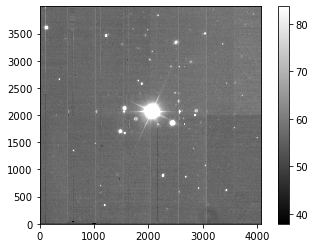

/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/meas_algorithms/22.0.1-23-gc2439a9a+e788d2a644/python/lsst/meas/algorithms/installGaussianPsf.py:77: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  psfSigma = psfModel.computeShape().getDeterminantRadius()
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/meas_algorithms/22.0.1-23-gc2439a9a+e788d2a644/python/lsst/meas/algorithms/installGaussianPsf.py:78: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  width, height = psfModel.computeImage().getDimensions()
INFO:quickFrameMeasurementTask:Found 10 sources in exposure
INFO:quickFrameMeasurementTask:Measured 10 of 10 sources in exposure


Struct(success=True; brightestObjCentroid=(2074.369233752368, 2068.7141000633173); brightestObjCentroidCofM=(2056.4202748134367, 2065.863044713569); brightestObj_xXyY=(0.7680132788613871, 0.7003072793585721); brightestObjApFlux70=79547340.47431946; brightestObjApFlux25=34315418.32763672; medianXxYy=(1.541493260028591, 1.3450887602817567))


In [17]:
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)
primera = 2021100500254
exp = butler.get('quickLookExp', detector=0, expId=primera)
plt.imshow(exp.image.array,cmap='gray',origin='lower',vmin=np.percentile(exp.image.array,5),vmax=np.percentile(exp.image.array,98))
plt.colorbar()
plt.show()
result = qm.run(exp)
print(result)

# Extract metadata from the headers for each tracking test longer than 10 minutes

In [18]:
# Use only the first 10 minutes for the test 
firstExpIds = [[2021100500254, 20], [2021100500275, 20]]
posData = {}
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)

for firstExpId in firstExpIds:
    print('Empezamos con la', firstExpId[0])
    data = {}
    centroids = []
    els = []
    azs = []
    decs = []
    ras = []
    rotpas = []
    tStart = []
    tEnd = []
    source = []

    numExp = firstExpId[1]
    for i in range(numExp):
        expId = firstExpId[0] + i
        exp = butler.get('quickLookExp', detector=0, expId=expId)
        result = qm.run(exp)
        centroids.append(result.brightestObjCentroid)
        mData = exp.getMetadata()
        els.append(mData['ELSTART'])
        azs.append(mData['AZSTART'])
        decs.append(mData['DECSTART'])
        ras.append(mData['RASTART'])
        rotpas.append(mData['ROTPA'])
        tStart.append(mData['DATE-BEG'])
        tEnd.append(mData['DATE-END'])
        source.append(mData['OBJECT'])
    data['Elevation'] = els
    data['Azimuth'] = azs
    data['Dec'] = decs
    data['RA'] = ras
    data['ROTPA'] = rotpas
    data['Centroids'] = centroids
    data['StartTime'] = tStart
    data['EndTime'] = tEnd
    data['Source'] = source
    posData[firstExpId[0]] = data

Empezamos con la 2021100500254


CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000254: 'MJD-OBS not found'
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/meas_algorithms/22.0.1-23-gc2439a9a+e788d2a644/python/lsst/meas/algorithms/installGaussianPsf.py:77: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  psfSigma = psfModel.computeShape().getDeterminantRadius()
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/meas_algorithms/22.0.1-23-gc2439a9a+e788d2a644/python/lsst/meas/algorithms/installGaussianPsf.py:78: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  width, height = psfModel.computeImage().getDimensions()
INFO:quickFrameMeasurementTask:Found 10 sources in exposure
INFO:quickFrameMeasurementTask:Measured 10 of 10 sources in exposure
CRITICAL:

Empezamos con la 2021100500275


CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20211005_000275: 'MJD-OBS not found'
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/meas_algorithms/22.0.1-23-gc2439a9a+e788d2a644/python/lsst/meas/algorithms/installGaussianPsf.py:77: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  psfSigma = psfModel.computeShape().getDeterminantRadius()
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/meas_algorithms/22.0.1-23-gc2439a9a+e788d2a644/python/lsst/meas/algorithms/installGaussianPsf.py:78: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  width, height = psfModel.computeImage().getDimensions()
INFO:quickFrameMeasurementTask:Found 10 sources in exposure
INFO:quickFrameMeasurementTask:Measured 10 of 10 sources in exposure
CRITICAL:

# Write data into a file / Recover data from file

In [ ]:
import json
#json.dump(positionData, a_file)
f = open("posData10min202110_file","w")

f.write(json.dumps(posData))

# close file
f.close()


In [8]:
# Recover posData dictionary from file posData_file:
import json
  
# reading the data from the file
with open('afile') as f:
    data = f.read()
  
print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
posData = json.loads(data)
  
print("Data type after reconstruction : ", type(posData))
print(posData)

FileNotFoundError: [Errno 2] No such file or directory: 'afile'

# Obtain centroids and deviation RMS for each test

In [16]:
firstExpIds = [[2021100500254, 20], [2021100500275, 20]]
rmslist = []
plateScale = exp.getWcs().getPixelScale().asArcseconds() # arcseconds/pixel
print(f"Tracking test \t Azimuth \t Elevation \t Duration (min) \t RMS Az \t RMS El \t RMS_tot")
for exposure in firstExpIds:
    firstExpId = str(exposure[0])
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    el = Angle(posData[firstExpId]['Elevation'][0] * u.deg)
    az = Angle(posData[firstExpId]['Azimuth'][0] * u.deg)
    dec = Angle(posData[firstExpId]['Dec'][0] * u.deg)
    rotpa = Angle(posData[firstExpId]['ROTPA'][0] * u.deg) 
    sinTheta =  np.cos(location.lat) / np.cos(dec) * np.sin(az)
    theta = Angle(np.arcsin(sinTheta))
    rotAzEl = rotpa - theta - Angle(90.0 * u.deg) 
    rotMatrix = np.array([[np.cos(rotAzEl), -np.sin(rotAzEl)], [np.sin(rotAzEl), np.cos(rotAzEl)]])
    for i in range(len(deviation)):
        deviation[i,:] = np.dot(rotMatrix,deviation[i,:])
   
    
    
    rms = np.sqrt((deviation * deviation).mean(axis=0))
    rms_tot = np.sqrt((rms * rms).sum())
    
    print(f"{firstExpId} \t {az:.1f} \t {el:.1f} \t {duration:.2f} \t\t\t {rms[0]:.3f} \t\t {rms[1]:.3f} \t\t {rms_tot:.3f}")
    
# print(az.deg, theta.deg, rotpa.deg, rotAzEl.deg)


Tracking test 	 Azimuth 	 Elevation 	 Duration (min) 	 RMS Az 	 RMS El 	 RMS_tot
2021100500254 	 -172.2 deg 	 68.4 deg 	 10.90 			 1.396 		 1.404 		 1.980
2021100500275 	 -199.1 deg 	 60.3 deg 	 10.91 			 1.471 		 0.931 		 1.741


# What do the tracking errors look like? Elevation deviation vs. Azimuth Deviation

In [13]:
firstExpIds = [[2021100500254, 20], [2021100500275, 20]]


IndexError: list index out of range

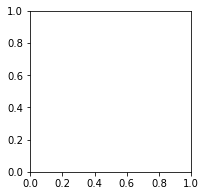

In [17]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
     
    plt.subplot(2,4,plotcounter, aspect=1.0)
    plt.plot(deviation[:,0], deviation[:,1], label = ('{} \n {}\" RMS \n Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = '*')
    plt.xlim(-3,3)
    plt.xlabel("Azimuth Deviation (arcseconds)")
    plt.ylim(-3,3)
    plt.ylabel("Elevation Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1
plt.savefig('Elevation vs Azimuth Deviation.jpg')

# Azimuth Deviation vs. Azimuth

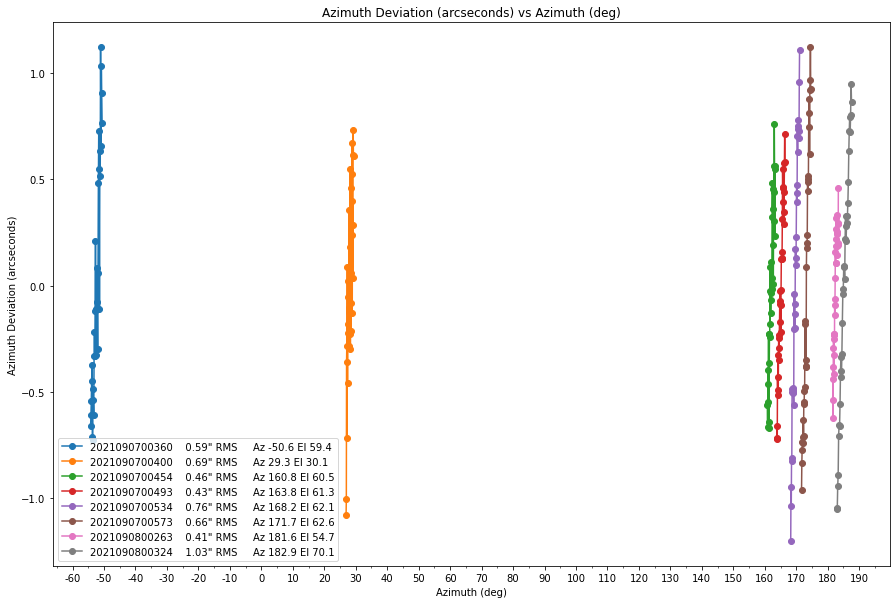

In [83]:

fig, ax = plt.subplots(figsize=(15,10))

for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    
    ax.plot(posData[firstExpId]['Azimuth'],deviation[:,0], label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')
    ax.set_ylabel("Azimuth Deviation (arcseconds)")    
    ax.set_xlabel("Azimuth (deg)")
    # ax.set_xlim(150,190)
    ax.legend()
    plt.title('Azimuth Deviation (arcseconds) vs Azimuth (deg)')

    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter('{x:.0f}')

    ax.xaxis.set_minor_locator(MultipleLocator(5))

plt.savefig('Azimuth Deviation vs Azimuth.jpg')

# Elevation Deviation vs. Azimuth

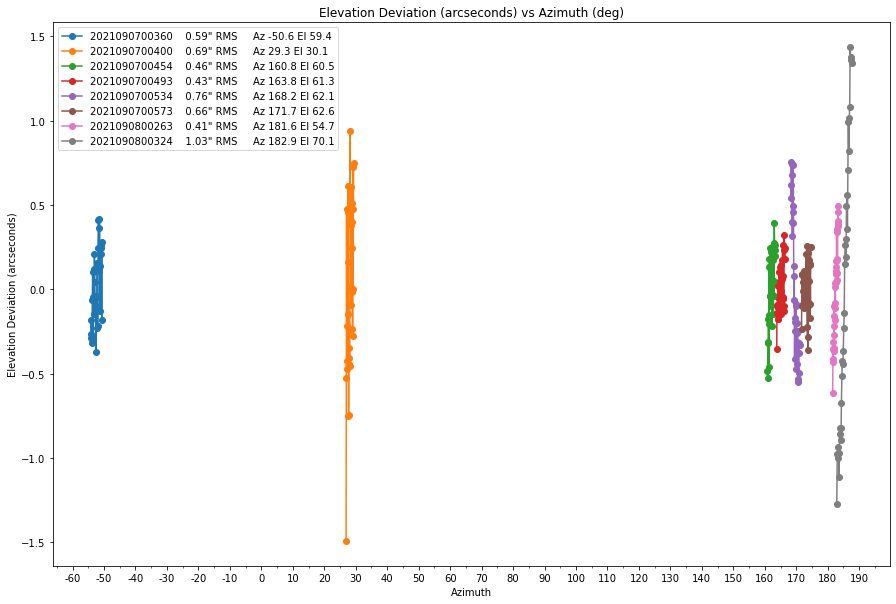

In [84]:

fig, ax = plt.subplots(figsize=(15,10))

for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale

    
    ax.plot(posData[firstExpId]['Azimuth'],deviation[:,1], label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')
    ax.set_ylabel("Elevation Deviation (arcseconds)")    
    ax.set_xlabel("Azimuth")
    ax.legend()
    plt.title('Elevation Deviation (arcseconds) vs Azimuth (deg)')


    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter('{x:.0f}')

    ax.xaxis.set_minor_locator(MultipleLocator(5))
    
plt.savefig('Elevation Deviation vs Azimuth.jpg')

# Elevation Deviation vs. Elevation

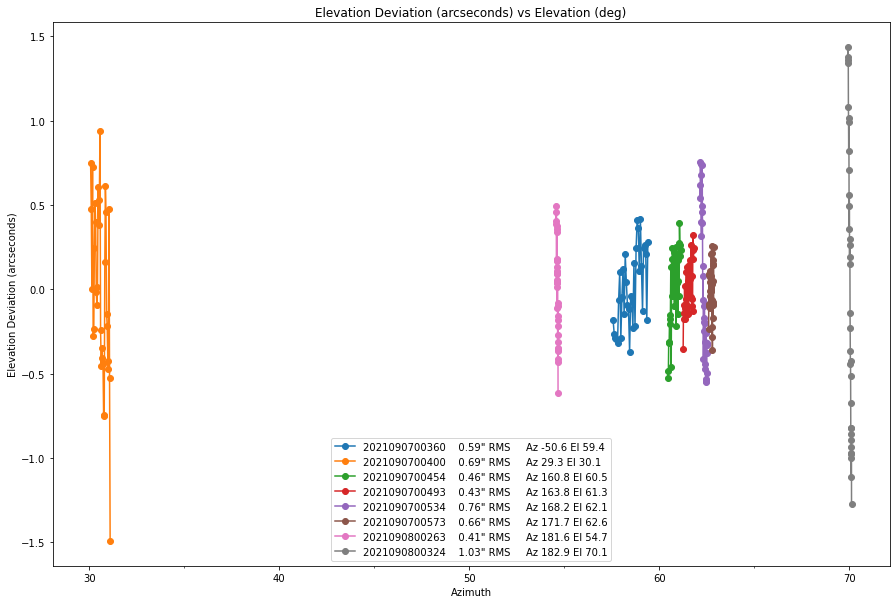

In [85]:

fig, ax = plt.subplots(figsize=(15,10))

for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    
    ax.plot(posData[firstExpId]['Elevation'],deviation[:,1], label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')
    ax.set_ylabel("Elevation Deviation (arcseconds)")    
    ax.set_xlabel("Azimuth")
    ax.legend()
    plt.title('Elevation Deviation (arcseconds) vs Elevation (deg)')


    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter('{x:.0f}')

    ax.xaxis.set_minor_locator(MultipleLocator(5))
    
plt.savefig('Elevation Deviation vs Elevation.jpg')

In [297]:
start_time = Time(posData['2021090700360']['StartTime'][0], format='fits', scale='tai')
print(start_time)
time = start_time.datetime.day
fmt = mdates.DateFormatter("%H:%M")


2021-09-08T06:47:33.263


In [42]:
len(deviation)

33

# Azimuth deviation vs. tracking time

<ipython-input-22-d7574f10fa32>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-22-d7574f10fa32>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-22-d7574f10fa32>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-22-d7574f10fa32>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-22-d7574f10fa32>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-22-d7574f10fa32>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-22-d7574f10fa32>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)
<ipython-input-22-d7574f10fa32>:21: UserWarning: FixedF

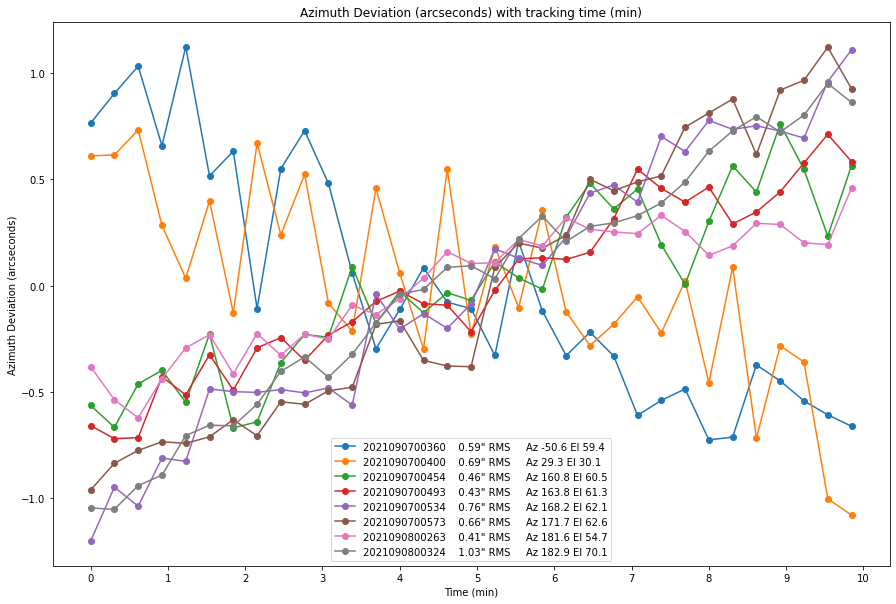

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
    
for exposure in firstExpIds:
    firstExpId = str(exposure[0])
    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    ax.plot(deviation[:,0], label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')

    ax.set_ylabel("Azimuth Deviation (arcseconds)")    
    ax.set_xlabel("Time (min)")
    ax.legend()
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3.25))
    plt.title('Azimuth Deviation (arcseconds) with tracking time (min)')
    a=ax.get_xticks().tolist()
    b = [-10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
    ax.set_xticklabels(b)

 
       # Time axis
    # Major ticks every 5 Hour.
    #loc_maj_ticks = mdates.HourLocator(interval=)
    #ax.xaxis.set_major_locator(loc_maj_ticks)

    # Minor ticks every 1 major
    #loc_major_ticks = mdates.MinuteLocator(interval=1)
    #ax.xaxis.major(loc_major_ticks)

    # Format Major 
    #fmt = mdates.DateFormatter("%H")
    #ax.xaxis.set_major_formatter(fmt)
    #fig.autofmt_xdate()


    #ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=False)
    # Labels and legend
    #plt.tick_params(axis='x', labelrotation=75)
plt.savefig('Azimuth Deviation vs Time.jpg')

# Elevation deviation vs. tracking time

<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-27-a88d43148ad7>:20: UserWarning: FixedF

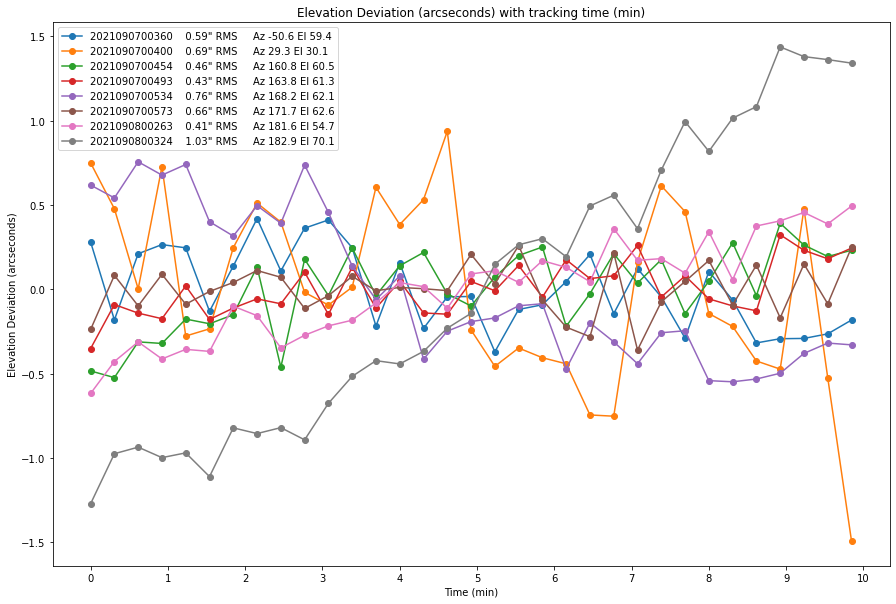

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    
    ax.plot(deviation[:,1], label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')

    ax.set_ylabel("Elevation Deviation (arcseconds)")    
    ax.set_xlabel("Time (min)")
    ax.legend()
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3.25))
    plt.title('Elevation Deviation (arcseconds) with tracking time (min)')

    
    a=ax.get_xticks().tolist()
    a = [-99999, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 999999]
    ax.set_xticklabels(a)

plt.savefig('Elevation Deviation vs Time.jpg')

#RADEC deviation

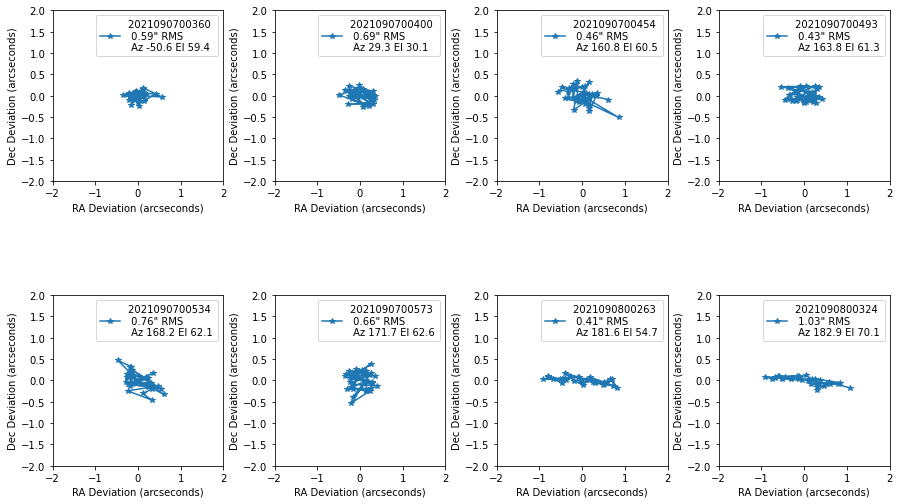

In [90]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.1,wspace=0.3)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
#     if firstExpId == 2021060900268:
#         print(ras)
#         print(decs)
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0
    plt.subplot(2,4,plotcounter, aspect=1.0)
    plt.plot(ra_deviation, dec_deviation, label = ('{} \n {}\" RMS \n Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))),marker ='*')
    plt.xlim(-2,2)
    plt.xlabel("RA Deviation (arcseconds)")
    plt.ylim(-2,2)
    plt.ylabel("Dec Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1
plt.savefig('Dec Deviation vs RA Deviation.jpg')

# RA deviation vs. tracking time

<ipython-input-25-6d055902226a>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-25-6d055902226a>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-25-6d055902226a>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-25-6d055902226a>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-25-6d055902226a>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-25-6d055902226a>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-25-6d055902226a>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-25-6d055902226a>:21: UserWarning: FixedF

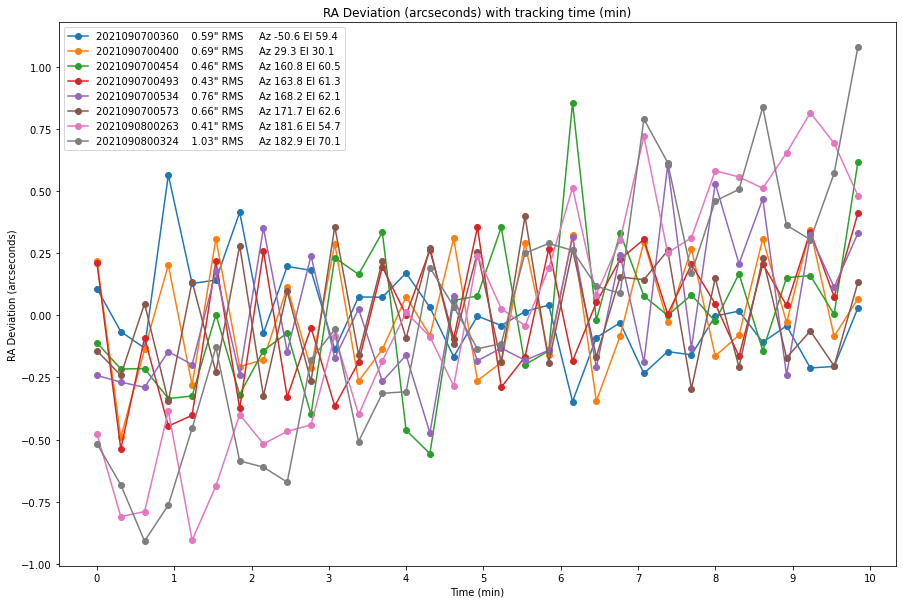

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0    
    
    ax.plot(ra_deviation, label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')
    ax.set_ylabel("RA Deviation (arcseconds)")    
    ax.set_xlabel("Time (min)")
    ax.legend()
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3.25))
    plt.title('RA Deviation (arcseconds) with tracking time (min)')

    a=ax.get_xticks().tolist()
    a = [-99999, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 999999]
    ax.set_xticklabels(a)

plt.savefig('RA Deviation vs Time.jpg')

# DEC deviation vs. tracking time

<ipython-input-28-24948da9b4d8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-28-24948da9b4d8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-28-24948da9b4d8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-28-24948da9b4d8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-28-24948da9b4d8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-28-24948da9b4d8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-28-24948da9b4d8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)
<ipython-input-28-24948da9b4d8>:24: UserWarning: FixedF

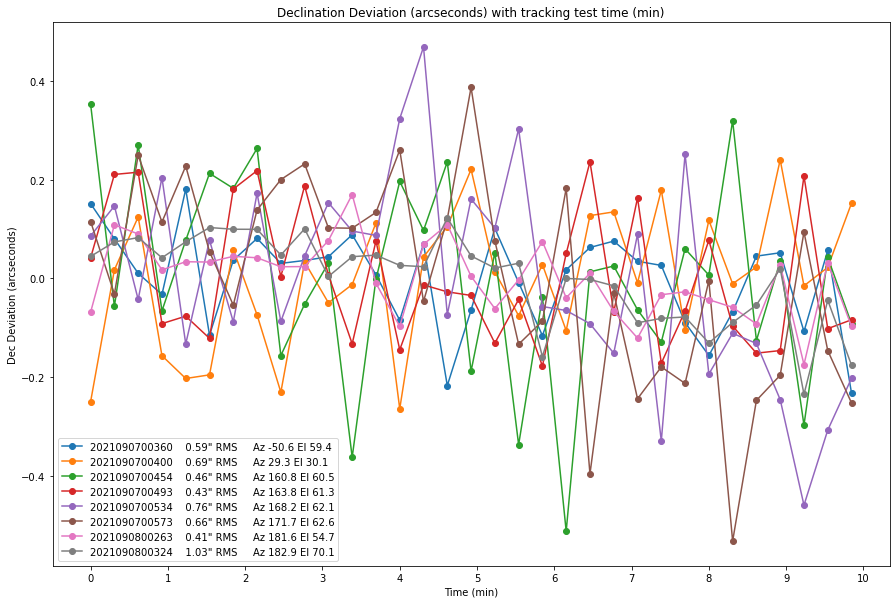

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0    
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    ax.plot(dec_deviation, label = ('{}    {}\" RMS     Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = 'o')
    ax.set_ylabel("Dec Deviation (arcseconds)")    
    ax.set_xlabel("Time (min)")
    ax.legend()
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3.25))
    plt.title('Declination Deviation (arcseconds) with tracking test time (min)')

    
    a=ax.get_xticks().tolist()
    a = [-10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
    ax.set_xticklabels(a)

plt.savefig('Dec Deviation vs Time.jpg')

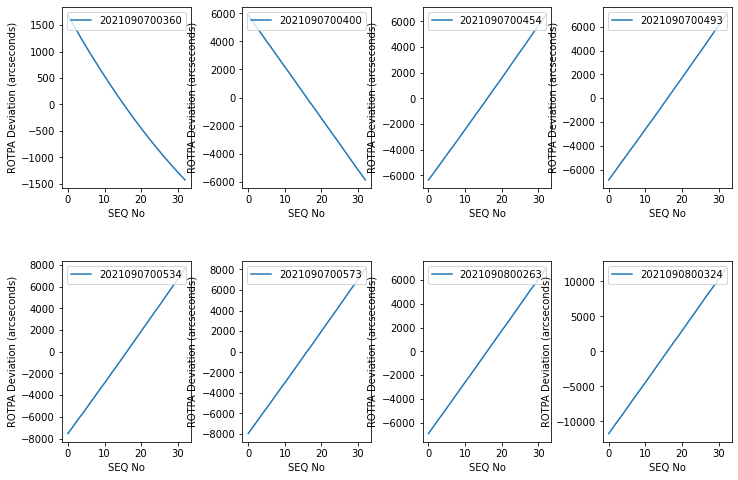

In [54]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    rotpas = np.array(posData[firstExpId]['ROTPA'])
    #print(rotpas)
    meanrotpa = rotpas.mean()
    #print(meanrotpa)
    rotpa_deviation = (rotpas - meanrotpa) * 3600.0
    #print(rotpa_deviation)
    plt.subplot(2,4,plotcounter)
    plt.plot(rotpa_deviation, label = str(firstExpId))
    #plt.xlim(-5,5)
    plt.xlabel("SEQ No")
    #plt.ylim(-5,5)
    plt.ylabel("ROTPA Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1
